In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import pprint
import os
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

In [2]:
filepath = os.path.join('Resources','each_state_new_cancer_rate.csv')
df = pd.read_csv(filepath)
df = df.rename(columns = {'Unnamed: 0':'States'})
df.head()

,States,Cancer Type,Age,Sex,Race,Type,Age-Adjusted Rate,Case Count,Population
0,Nevada,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,Data Suppressed,Data Suppressed,Data Suppressed
1,New Mexico,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,350.4,9202,2092741
2,Arizona,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,368.1,32863,7158024
3,Colorado,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,387.2,24550,5691287
4,California,All Types of Cancer,NaN,Male and Female,All Races and Ethnicities,Incidence,388.4,171748,39461588


In [11]:
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

states = df['States']
lat = []
lng = []
state_name = []
timezone = []

for state in states:
    query_url = url + state
    response = requests.get(query_url).json()
    state_name.append(response['name'])
    timezone.append(response['timezone'])
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
new_df = pd.DataFrame({'Lat':lat,'Lon':lng,'States':state_name, 'Timezone':timezone})
new_df.head()

,Lat,Lon,States,Timezone
0,39.2502,-116.7512,Nevada,-25200
1,34.5003,-106.0008,New Mexico,-21600
2,34.5003,-111.5010,Arizona,-25200
3,-22.8375,-51.9731,Colorado,-10800
4,38.3004,-76.5074,California,-14400


In [12]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 66},
 'cod': 200,
 'coord': {'lat': -30.7667, 'lon': 151.45},
 'dt': 1632592906,
 'id': 2161599,
 'main': {'feels_like': 276.93,
          'grnd_level': 898,
          'humidity': 99,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 279.39,
          'temp_max': 279.39,
          'temp_min': 275.91},
 'name': 'Kentucky',
 'sys': {'country': 'AU',
         'id': 2007453,
         'sunrise': 1632598741,
         'sunset': 1632642735,
         'type': 2},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 97, 'gust': 6.6, 'speed': 3.33}}


In [13]:
new_df = new_df.replace('State of Wyoming','Wyoming') 
new_df = new_df.replace('State of Maine','Maine')
new_df.head()

,Lat,Lon,States,Timezone
0,39.2502,-116.7512,Nevada,-25200
1,34.5003,-106.0008,New Mexico,-21600
2,34.5003,-111.5010,Arizona,-25200
3,-22.8375,-51.9731,Colorado,-10800
4,38.3004,-76.5074,California,-14400


In [78]:
combined_df = pd.merge(df, new_df, on = 'States', how = 'outer')
combined_df = combined_df [['States','Age-Adjusted Rate','Case Count','Population','Lat','Lon']]
combined_df = combined_df.iloc[1:]
combined_df ['Age-Adjusted Rate'] = combined_df ['Age-Adjusted Rate'].astype(float)
combined_df ['Lat'] = combined_df ['Lat'].astype(float)
combined_df ['Lon'] = combined_df ['Lon'].astype(float)
combined_df = combined_df.rename(columns={'Age-Adjusted Rate':'Rate','Case Count':'Cases'})
combined_df.head()

,States,Rate,Cases,Population,Lat,Lon
1,New Mexico,350.4,9202,2092741,34.5003,-106.0008
2,Arizona,368.1,32863,7158024,34.5003,-111.5010
3,Colorado,387.2,24550,5691287,-22.8375,-51.9731
4,California,388.4,171748,39461588,38.3004,-76.5074
5,Wyoming,394.1,2812,577601,43.0002,-107.5009


In [32]:
zone_path = os.path.join('Resources','zones.csv')
zone_df = pd.read_csv(zone_path)
zone_df.head()

lng_df = pd.merge(combined_df, zone_df, on = 'States', how = 'outer')
lng_df.head()

,States,Rate,Cases,Population,Lat,Lon,Timezone
0,New Mexico,350.4,9202,2092741,34.5003,-106.0008,Mountain Time
1,Arizona,368.1,32863,7158024,34.5003,-111.5010,Mountain Time
2,Colorado,387.2,24550,5691287,-22.8375,-51.9731,Mountain Time
3,California,388.4,171748,39461588,38.3004,-76.5074,Pacific Time
4,Wyoming,394.1,2812,577601,43.0002,-107.5009,Mountain Time


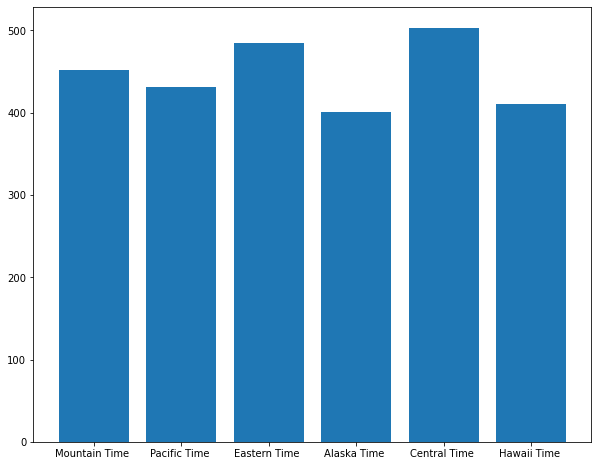

In [77]:
plt.figure(figsize=(10,8))
plt.bar(lng_df['Timezone'], lng_df['Rate'], align='center')
plt.show()

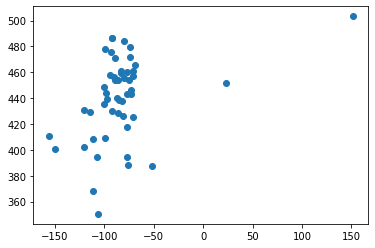

In [76]:
plt.scatter(lng_df['Lon'], lng_df['Rate'])

<AxesSubplot:title={'center':'Rate'}, xlabel='Timezone'>

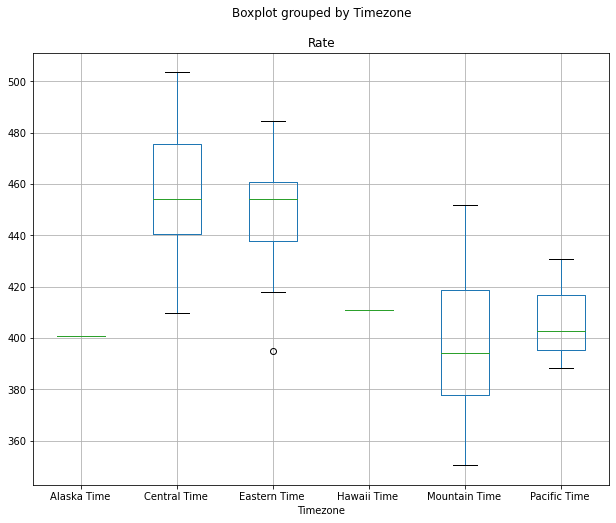

In [73]:
lng_df.boxplot('Rate',by='Timezone', figsize=(10,8))